An isolation forest is a collection of individual tree structures that recursively partition the data set. 
In each iteration of the process, a random feature is selected, and the data is split based on a randomly chosen value between the minimum and maximum of
the chosen feature. 
This is repeated until the entire data set is partitioned to form an individual tree in the forest. Anomalies generally form much shorter paths from the root than normal data points since they are much more easily isolated. 
You can find the anomaly score by using a function of the data point involving the average path length

# Library

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [25]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import describe,scoring

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [3]:
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
        "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", 
        "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
        "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
        "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
        "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
        "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

df = pd.read_csv(f"E:/gitlab/machine-learning/dataset/kddcup.data.corrected", sep=",", names=columns, index_col=None)

In [4]:
describe.describe_data(df)

'table size 4898431 x 42'

Dataframe has 42 columns.
There are 0 columns that have missing values.


,column_names,Data Type,Missing Values,% missing,low Value,Hi Value,stddev Value,unique
0,duration,int64,0,0.0,0,58329,723,9883.0
1,protocol_type,object,0,0.0,0,0,0,3.0
2,service,object,0,0.0,0,0,0,70.0
3,flag,object,0,0.0,0,0,0,11.0
4,src_bytes,int64,0,0.0,0,1379963888,941431,7195.0
5,dst_bytes,int64,0,0.0,0,1309937401,645012,21493.0
6,land,int64,0,0.0,0,1,0,2.0
7,wrong_fragment,int64,0,0.0,0,3,0,3.0
8,urgent,int64,0,0.0,0,14,0,6.0
9,hot,int64,0,0.0,0,77,0,30.0


# Feature engineering

In [5]:
df = df[df["service"] == "http"]
df = df.drop("service", axis=1)
columns.remove("service")

In [6]:
describe.describe_data(df)

'table size 623091 x 41'

Dataframe has 41 columns.
There are 0 columns that have missing values.


,column_names,Data Type,Missing Values,% missing,low Value,Hi Value,stddev Value,unique
0,duration,int64,0,0.0,0,41065,54,458.0
1,protocol_type,object,0,0.0,0,0,0,1.0
2,flag,object,0,0.0,0,0,0,11.0
3,src_bytes,int64,0,0.0,0,54540,3208,524.0
4,dst_bytes,int64,0,0.0,0,11730594,23639,20003.0
5,land,int64,0,0.0,0,0,0,1.0
6,wrong_fragment,int64,0,0.0,0,0,0,1.0
7,urgent,int64,0,0.0,0,0,0,1.0
8,hot,int64,0,0.0,0,21,0,8.0
9,num_failed_logins,int64,0,0.0,0,0,0,1.0


In [7]:
describe.vc(df,'label')

normal.       619046
back.           2203
neptune.        1801
portsweep.        16
ipsweep.          13
satan.             7
phf.               4
nmap.              1
Name: label, dtype: int64

In [8]:
for col in df.columns:
    if df[col].dtype == "object":
        encoded = LabelEncoder()
        encoded.fit(df[col])
        df[col] = encoded.transform(df[col])

In [9]:
df

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,9,215,45076,0,0,0,0,0,...,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,4
1,0,0,9,162,4528,0,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,4
2,0,0,9,236,1228,0,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,4
3,0,0,9,233,2032,0,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,4
4,0,0,9,239,486,0,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,0,9,212,2288,0,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,4
4898427,0,0,9,219,236,0,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,4
4898428,0,0,9,218,3610,0,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,4
4898429,0,0,9,219,1234,0,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,4


 # suffle and split

In [10]:
for f in range(0, 3):
    df = df.iloc[np.random.permutation(len(df))]
    
df2 = df[:500000]
labels = df2["label"]
df_validate = df[500000:]
x_train, x_test, y_train, y_test = train_test_split(df2, labels, test_size = 0.2, random_state = 42)

x_val, y_val = df_validate, df_validate["label"]

In [11]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))
print("x_val:%s\ny_val:%s\n" % (x_val.shape, y_val.shape))

Shapes:
x_train:(400000, 41)
y_train:(400000,)

x_test:(100000, 41)
y_test:(100000,)

x_val:(123091, 41)
y_val:(123091,)



# Model

Here’s an explanation of the parameters:

1. n_estimators is the number of trees to use in the forest. The default
is 100.

2. max_samples is the maximum number of data points that the
tree should build on. The default is whatever is smaller: 256 or the
number of samples in the data set.

3. contamination is an estimate of the percentage of the entire data set
that should be considered an anomaly/outlier. It is 0.1 by default.

4. random_state is the number it will initialize the random number
generator with to use during the training process. An isolation forest
utilizes the random number generator quite extensively during the
training process

In [12]:
isolation_forest = IsolationForest(n_estimators=100, max_samples=256, contamination=0.1, random_state=42)

In [13]:
isolation_forest.fit(x_train)

IsolationForest(contamination=0.1, max_samples=256, random_state=42)

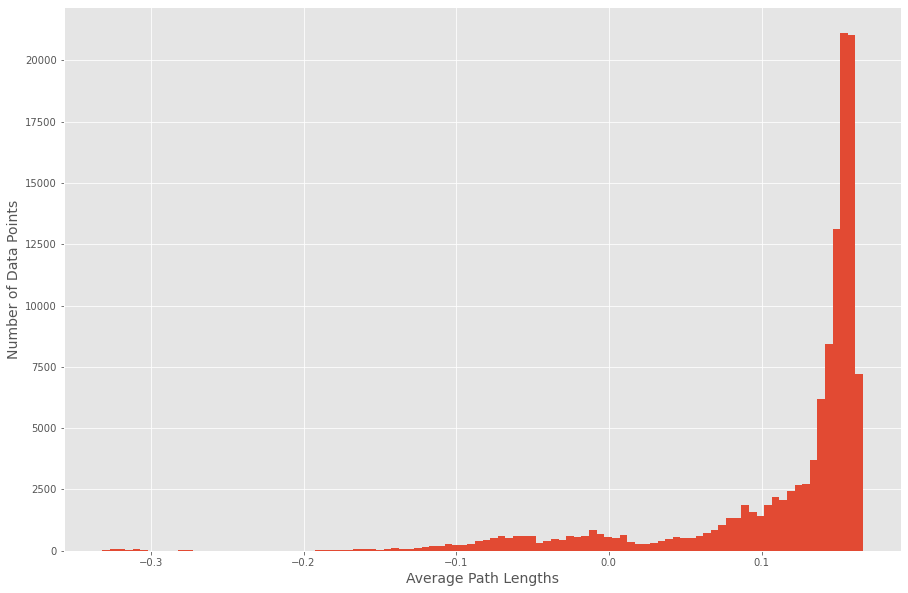

In [14]:
anomaly_scores = isolation_forest.decision_function(x_val)
plt.figure(figsize=(15, 10))
plt.hist(anomaly_scores, bins=100)
plt.xlabel('Average Path Lengths', fontsize=14)
plt.ylabel('Number of Data Points', fontsize=14)
plt.show()

A histogram plotting the average path lengths for the data points.
It helps you determine what is an anomaly by using the shortest set of path lengths, since that indicates that the model was able to easily isolate those points

In [15]:
from sklearn.metrics import roc_auc_score

anomalies = anomaly_scores > -0.19
matches = y_val == list(encoded.classes_).index("normal.")
auc = roc_auc_score(anomalies, matches)
print("AUC: {:.2%}".format (auc))

AUC: 95.51%


Looking at the graph, there appears to be a few anomalous data with average path of less than -0.15. You expect there to be a few outliers within the normal range of data, so let’s pick something more extreme, such as -0.19. Remember that the lesser the path length, the more likely the data is to be anomalous, hence why there’s a curve that increases drastically as the graph
goes right.

# testing

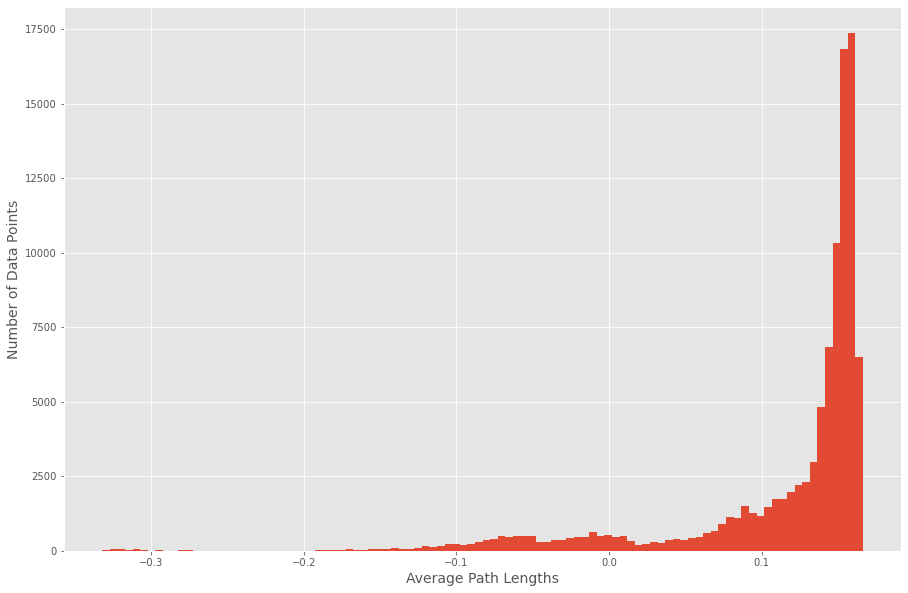

In [16]:
anomaly_scores_test = isolation_forest.decision_function(x_test)
plt.figure(figsize=(15, 10))
plt.hist(anomaly_scores_test, bins=100)
plt.xlabel('Average Path Lengths', fontsize=14)
plt.ylabel('Number of Data Points', fontsize=14)
plt.show()

In [17]:
anomalies_test = anomaly_scores_test > -0.19
matches = y_test == list(encoded.classes_).index("normal.")
auc = roc_auc_score(anomalies_test, matches)
print("AUC: {:.2%}".format (auc))

AUC: 95.20%


In [24]:
matches

4892659    True
794340     True
273184     True
1356171    True
771634     True
           ... 
3405428    True
4792108    True
788101     True
44527      True
2835       True
Name: label, Length: 100000, dtype: bool

comfusion matrix = 
[[  295    30]
 [  368 99307]]

accuracy_score =  0.996
balanced_accuracy_score =  0.952

precision score =  0.9997
average precision score =  0.9997
recall score =  0.9963

F1 score =  0.998
F2 score =  0.999
F3 score =  0.9994
F_beta score =  0.9994
Matthews Correlation Coefficient score =  0.634

AUC of Precision-Recall Curve on Testing =  0.9998
Best Threshold for Precision-Recall Curve = 0.000000
F-Score = 0.998
AUC of ROC =  0.952

Best Threshold for ROC = 1.000000
G-Mean = 0.951
Best Threshold with Youden’s J statistic = 1.000000

Cohens kappa =  0.5954
Gini =  0.9997

Expected Approval Rate =  0.9934
Expected Default Rate =  0.0003

classification_report
              precision    recall  f1-score   support

       False       0.44      0.91      0.60       325
        True       1.00      1.00      1.00     99675

    accuracy                           1.00    100000
   macro avg       0.72      0.95      0.80    100000
weighted avg       1.00      1.00    

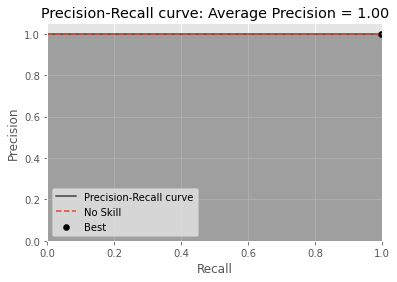

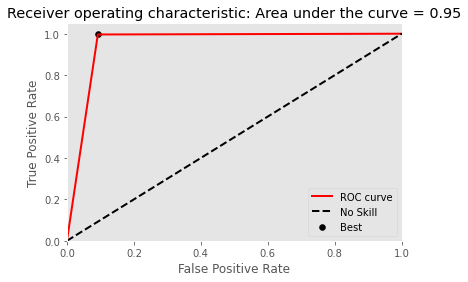


time span=  1


In [27]:
scoring.print_score(anomalies_test,matches,matches)